In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("C:/Users/ghwo9/Machine_Learning/mitbih_test.csv", header=None)
df_test = pd.read_csv("C:/Users/ghwo9/Machine_Learning/mitbih_test.csv", header=None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


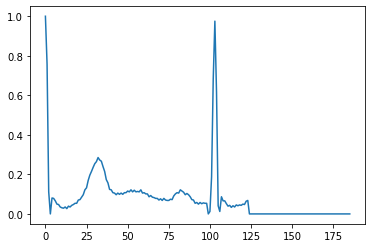

In [3]:
plt.plot(df_train.iloc[0,:186])

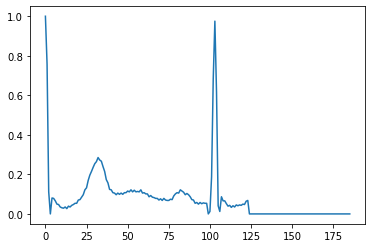

In [4]:
plt.plot(df_test.iloc[0,:186])

In [5]:
# plot the circle of value counts in dataset
def plot_equilibre(equilibre):
    plt.figure(figsize=(10,10))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


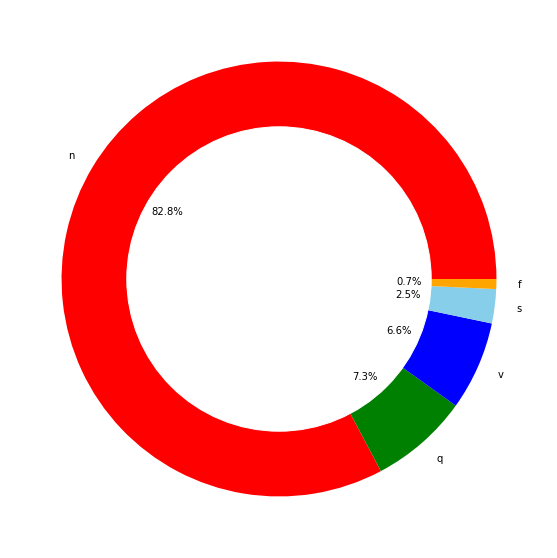

In [6]:
print(df_train[187].value_counts())

plot_equilibre(df_train[187].value_counts())

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


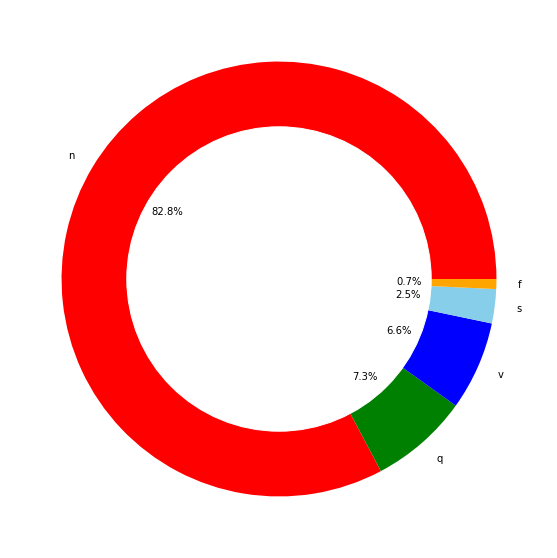

In [7]:
print(df_test[187].value_counts())

plot_equilibre(df_test[187].value_counts())

In [23]:
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1].astype(int)

X_test  = df_test.values[:, :-1]
y_test  = df_test.values[:, -1].astype(int)

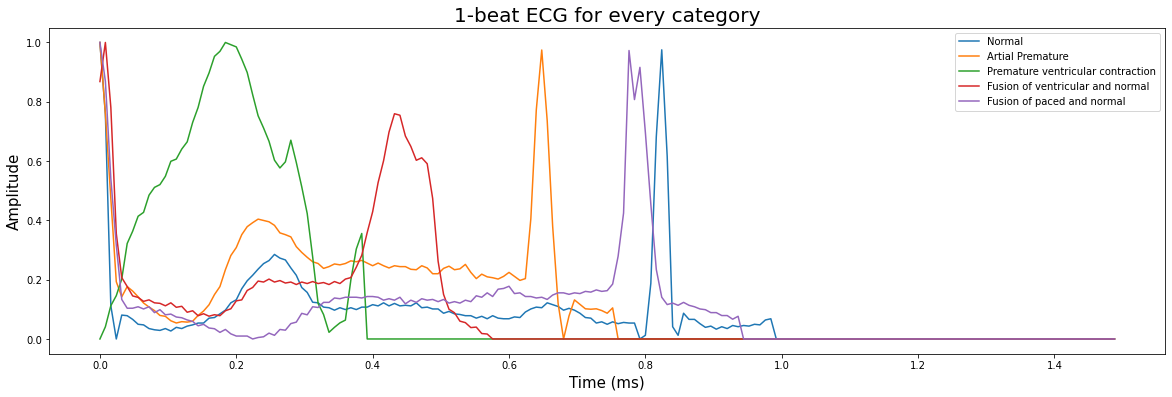

In [32]:
# plot one ECG for each category
C0 = np.argwhere(y_train == 0).flatten()
C1 = np.argwhere(y_train == 1).flatten()
C2 = np.argwhere(y_train == 2).flatten()
C3 = np.argwhere(y_train == 3).flatten()
C4 = np.argwhere(y_train == 4).flatten()

x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,6))
plt.plot(x, X_train[C0, :][0], label="Normal")
plt.plot(x, X_train[C1, :][0], label="Artial Premature")
plt.plot(x, X_train[C2, :][0], label="Premature ventricular contraction")
plt.plot(x, X_train[C3, :][0], label="Fusion of ventricular and normal")
plt.plot(x, X_train[C4, :][0], label="Fusion of paced and normal")
plt.legend()
plt.title("1-beat ECG for every category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [10]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

print(X_train.shape)
print(X_test.shape)

(21892, 187, 1)
(21892, 187, 1)


In [11]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test  = utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(21892, 5)
(21892, 5)


In [12]:
n_obs, feature, depth = X_train.shape
num_classes= 5

In [13]:
# Build Model
from tensorflow.keras import models, layers, optimizers, callbacks

inputs = layers.Input(shape=(feature,depth))
C   = layers.Conv1D(filters=32, kernel_size=5, strides=1)(inputs)

C11 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = layers.Activation("relu")(C11)
C12 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = layers.Add()([C12, C])
A12 = layers.Activation("relu")(S11)
M11 = layers.MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = layers.Activation("relu")(C21)
C22 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = layers.Add()([C22, M11])
A22 = layers.Activation("relu")(S11)
M21 = layers.MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = layers.Activation("relu")(C31)
C32 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = layers.Add()([C32, M21])
A32 = layers.Activation("relu")(S31)
M31 = layers.MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = layers.Activation("relu")(C41)
C42 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = layers.Add()([C42, M31])
A42 = layers.Activation("relu")(S41)
M41 = layers.MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = layers.Activation("relu")(C51)
C52 = layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = layers.Add()([C52, M41])
A52 = layers.Activation("relu")(S51)
M51 = layers.MaxPooling1D(pool_size=5, strides=2)(A52)

F1  = layers.Flatten()(M51)

D1  = layers.Dense(32)(F1)
A6  = layers.Activation("relu")(D1)
D2  = layers.Dense(32)(A6)

outputs = layers.Dense(num_classes, activation="softmax")(D2)

model = models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      5152        conv1d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 183, 32)      0           conv1d_1[0][0]                   
______________________________________________________________________________________________

In [14]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
batch_size = 100
num_epochs = 10 

In [16]:
# Train Model
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
219/219 [==============================] - 7s 16ms/step - loss: 0.4276 - accuracy: 0.8709 - val_loss: 0.2756 - val_accuracy: 0.9246
Epoch 2/10
219/219 [==============================] - 3s 12ms/step - loss: 0.2063 - accuracy: 0.9408 - val_loss: 0.1801 - val_accuracy: 0.9461
Epoch 3/10
219/219 [==============================] - 3s 13ms/step - loss: 0.1522 - accuracy: 0.9587 - val_loss: 0.1300 - val_accuracy: 0.9642
Epoch 4/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1250 - accuracy: 0.9662 - val_loss: 0.1042 - val_accuracy: 0.9728
Epoch 5/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1087 - accuracy: 0.9695 - val_loss: 0.0876 - val_accuracy: 0.9744
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0978 - accuracy: 0.9728 - val_loss: 0.0824 - val_accuracy: 0.9775
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.0879 - accuracy: 0.9748 - val_loss: 0.0953 - val_accuracy: 0.9713

In [17]:
# Save Model
models.save_model(model, 'ecg_arrhythmia.hdf5')


C:\Users\ghwo9\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

labels = ["Normal",
          "Artial Premature",
          "Premature ventricular contraction",
          "Fusion of ventricular and normal",
          "Fusion of paced and normal"]

In [19]:
# Test Model
predY = model.predict(X_test)
y_pred = np.argmax(predY,axis=1)
y_actual = np.argmax(y_test,axis=1)
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[18055    14    30    10     9]
 [  182   362     9     2     1]
 [   35     2  1403     5     3]
 [   24     0    31   107     0]
 [   12     0     4     0  1592]]


In [20]:
print(classification_report(y_actual, y_pred, target_names=labels))

                                   precision    recall  f1-score   support

                           Normal       0.99      1.00      0.99     18118
                 Artial Premature       0.96      0.65      0.78       556
Premature ventricular contraction       0.95      0.97      0.96      1448
 Fusion of ventricular and normal       0.86      0.66      0.75       162
       Fusion of paced and normal       0.99      0.99      0.99      1608

                         accuracy                           0.98     21892
                        macro avg       0.95      0.85      0.89     21892
                     weighted avg       0.98      0.98      0.98     21892

